# Sample Class
a class that computes the sample mean and sample variance of an observation of

In [19]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy


class Sample(object):
    
    # Class Object Attributes
    
    # initializer (constructor)
    def __init__(self, data, population_mean=None, population_sigma=None):
        self.data = data     # we assume that data is a list
        self.population_mean = population_mean
        self.population_sigma = population_sigma
    # deconstructer
    def __del__(self):
        pass
    
    def merge_two_data(self, other_data):
        for item in other_data:
            (self.data).append(item)
    
    def set_data(self, new_data):
        self.data = new_data
        
    def get_data(self):
        return self.data
    
    def set_population_mean(self, new_population_mean):
        self.population_mean = new_population_mean
        
    def get_population_mean(self):
        return self.population_mean
    
    def set_population_sigma(self, new_population_sigma):
        self.population_sigma = new_population_sigma
        
    def get_population_sigma(self):
        return self.population_sigma
    
    def length(self):
        return len(self.data)
    
    def sample_mean(self):
        temp = 0.0
        for item in self.data:
            temp = temp + item
        temp = (1.0*temp)/(self.length())
        return temp
    
    def sample_variance(self):
        temp = 0.0
        Xbar = self.sample_mean()
        for X in self.data:
            temp = temp + (X - Xbar)**2
        temp = (1.0*temp)/(self.length()-1)
        return temp
    
    def confidence_interval_for_variance_lower(self, CL=0.95):
        temp = 0.0
        alpha = (1.0-CL)
        alpha_half = alpha/2
        percentile_chiSquared_lower = stats.chi2.ppf(q=1-alpha_half, df=self.length()-1, loc=0, scale=1)
        temp = (self.length()-1)*(self.sample_variance())/(self.population_sigma**2)
        lower_interval = temp/(percentile_chiSquared_lower)
        return lower_interval

    def confidence_interval_for_variance_upper(self, CL=0.95):
        temp = 0.0
        alpha = (1.0-CL)
        alpha_half = alpha/2
        percentile_chiSquared_upper = stats.chi2.ppf(q=alpha_half, df=self.length()-1, loc=0, scale=1)
        temp = (self.length()-1)*(self.sample_variance())/(self.population_sigma**2)
        upper_interval = temp/(percentile_chiSquared_upper)
        return upper_interval
    
    def print_confidence_interval_for_variance(self, CL=0.95):
        print("Confidence interval for population variance in "+str(CL)+" CL: ")
        print("["+str(self.confidence_interval_for_variance_lower(CL))+" , "+str(self.confidence_interval_for_variance_upper(CL))+"]")
        
    def likelihood_for_SampleVariance_in_gamma_distribution_model(self, sigma):
        y = 1
        n = self.length()
        alpha = (n-1.0)/(2.0)
        beta = 2*(sigma**2)
        y = y*stats.gamma.pdf(self.sample_variance(), a=alpha, loc=beta)             
        return y*(1.0/(n-1.0))


mean of Sample means :0    0.042556
dtype: float64
variance of Sample means: 0    9.922787
dtype: float64
standard deviation of Sample means: 0    3.150046
dtype: float64
mean of Sample Variances :0    99.765027
dtype: float64
variance of Sample Variances: 0    2215.302413
dtype: float64
Standard deviation of Sample Variances: 0    47.066999
dtype: float64


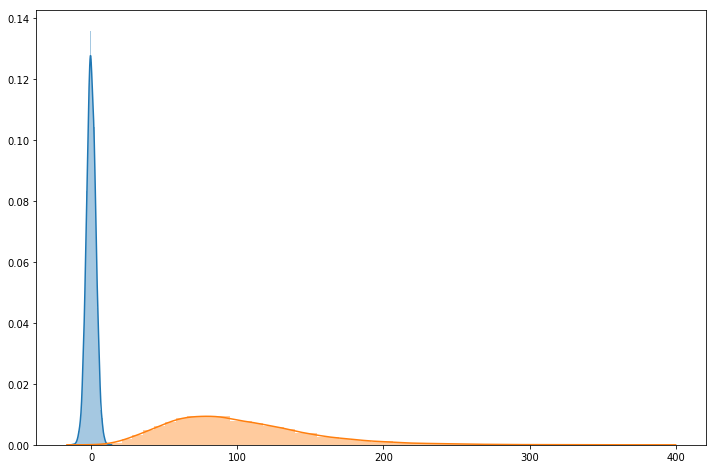

In [20]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

sample_means_data=[]
sample_variances_data=[]
sample_variances_likelihoods_data=[]
import pandas as pd
import seaborn as sns
for i in xrange(1,10000):
    new = Sample(np.random.normal(loc=0, scale=10, size=10),population_sigma=1)
    sample_means_data.append(new.sample_mean())
    sample_variances_data.append(new.sample_variance())
    sample_variances_likelihoods_data.append(new.likelihood_for_SampleVariance_in_gamma_distribution_model)
    
sns.distplot(sample_means_data)
df = pd.DataFrame(sample_means_data)
df2 = pd.DataFrame(sample_variances_data)
print("mean of Sample means :"+str(df.mean()))
print("variance of Sample means: "+str(df.var()))
print("standard deviation of Sample means: "+str(df.std()))
sns.distplot(sample_variances_data)
print("mean of Sample Variances :"+str(df2.mean()))
print("variance of Sample Variances: "+str(df2.var()))
print("Standard deviation of Sample Variances: "+str(df2.std()))

In [397]:
lh = 1
#sample_variances_likelihoods_data[1](0.1)
def likelihood(z):
    lh=1
    for item in range(0,len(sample_variances_likelihoods_data)):
        lh = lh*(sample_variances_likelihoods_data[item](z))
    return lh

likelihood(4.5)

0.0

In [378]:
sample_variances_likelihoods_data

0.0

NameError: name 'likelihood' is not defined

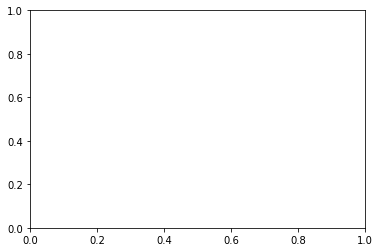

In [3]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
x_points = []
y_points = []
for i in xrange(0,100):
    x_points.append(i*0.2)
    y_points.append(likelihood(i*0.2))

p = ax.plot(x_points, y_points, 'b')
ax.set_xlabel('sigma')
ax.set_ylabel('likelihood')
ax.set_title('Likelihood Plot')
fig

1.827675631747244e-24

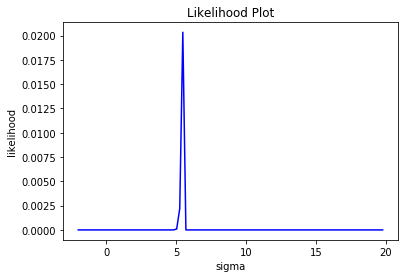

In [337]:
new = Sample(np.random.normal(loc=0, scale=10, size=10),population_sigma=1)
new.plot_likelihood_for_SampleVariance_in_gamma_distribution_model(-2,20,100)
new.likelihood_for_SampleVariance_in_gamma_distribution_model(0.001)

In [206]:
new.confidence_interval_for_variance_lower()

3.437579690515162e-05

In [49]:
new.confidence_interval_for_variance_upper()

19.748945102603606

In [50]:
new.print_confidence_interval_for_variance(0.9999)

Confidence interval for population variance in 0.9999 CL: 
[0.050487264950613515 , 9999.749997918083]


In [154]:
for item in xrange(1,2):
    print new.likelihood_for_NMinu1TimesSampleVariance_in_gamma_distribution_model(0.01*item)

AttributeError: 'Sample' object has no attribute 'likelihood_for_NMinu1TimesSampleVariance_in_gamma_distribution_model'

In [155]:
new.length()

100

In [160]:
new.sample_mean()

0.21109462758350334

In [161]:
new.sample_variance()

0.4209951863782046

In [226]:
new.get_data()

[1, 2, 3, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 1, 0, 6, 10]

In [227]:
new.merge_two_data([5,6,9])

In [205]:
new.get_data()

[1, 2, 3, 1, 1, 2, 1, 3, 1, 2, 3, 1, 1, 1, 1, 0, 6, 10, 5, 6, 9]

In [147]:
del new

NameError: name 'new' is not defined

In [192]:
alpha = 5.5
beta = 3
x=xrange(1,100)
y1 = stats.gamma.pdf(15, a=alpha, loc=beta)

In [193]:
y1

0.008431892438809077

In [280]:
range()

SyntaxError: invalid syntax (<ipython-input-280-eb35785f49f8>, line 1)